In [1]:

import matplotlib.pyplot as plt
import matplotlib.tri as tri
%matplotlib inline
import numpy as np
from utils.AORSA_Analysis import Aorsa_Post_Process

In [2]:
# set up local case directory
casepath =  '/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/'
eqdsk_name = 'g147634.04525'
aorsa_input_file = 'aorsa2d_modified.in'
#vtk_file = '/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/aorsa_4df/Efield_2D_low_rez_cql_compare.vtk'
vtk_file = '/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/Efield_2D.vtk'#'Efield_2D_kspeci.vtk'#'Efield_2D_new.vtk''Efield_2D_29.vtk'
#vtk_file ='/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/iterations_scripts/Efield_2D_2phi_flip.vtk'
# casepath =  '/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/sam_example_cql_aorsa/'
# eqdsk_name = 'eqdsk'
# aorsa_input_file = 'aorsa2d.in'
# vtk_file = 'Efield_check.vtk'#'Efield_2D_john_merge.vtk'


['   90   86\n']


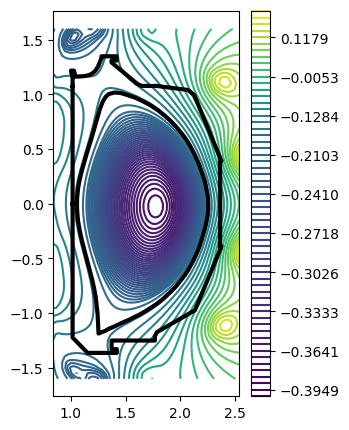

In [3]:
# test out plotting E+ 
aorsa_pp = Aorsa_Post_Process(vtk_file=vtk_file, aorsa2d_input_file=casepath+aorsa_input_file, eqdsk_file=casepath+eqdsk_name)

aorsa_pp.plot_equilibrium(figsize=(3, 5), levels=np.append(np.linspace(-.4, -0.2, 40), np.linspace(-.19, 0.2, 20) ))

In [4]:
aorsa_pp.mesh.point_data.keys()

dict_keys(['Real_E_alpha', 'Acold', 'Bcold', 'Ccold', 'Real_eb', 'Imag_eb', 'redotj', 'redotje', 'redotj1', 'redotj2', 'redotj3', 'wdote', 'wdoti2', 'wdoti1', 'wdoti3', 'wdoti4', 'wdot_tot', 'rho', 'fz0', 'mod_eb', 'mod_e', 'mod_eplus', 'mod_eminus', 're_eplus', 'im_eplus', 're_eminus', 'im_eminus', 'omgexb', 'uzeta', 'fpsi0', 'ftheta0', 'ntilda_e_real', 'divq', 'reomg1', 'reomg2', 'reomglh', 'Re_kperp2_fast', 'Im_kperp2_fast', 'Re_kperp2_slow', 'Im_kperp2_slow', 'xkprl_a', 'Re_P_a', 'xn', 'xkte'])

In [5]:
array = aorsa_pp.mesh.point_data['re_eminus']
if (~np.isnan(array)).any():
    print("At least one element is NOT NaN")
else:
    print("All elements are NaN")

At least one element is NOT NaN


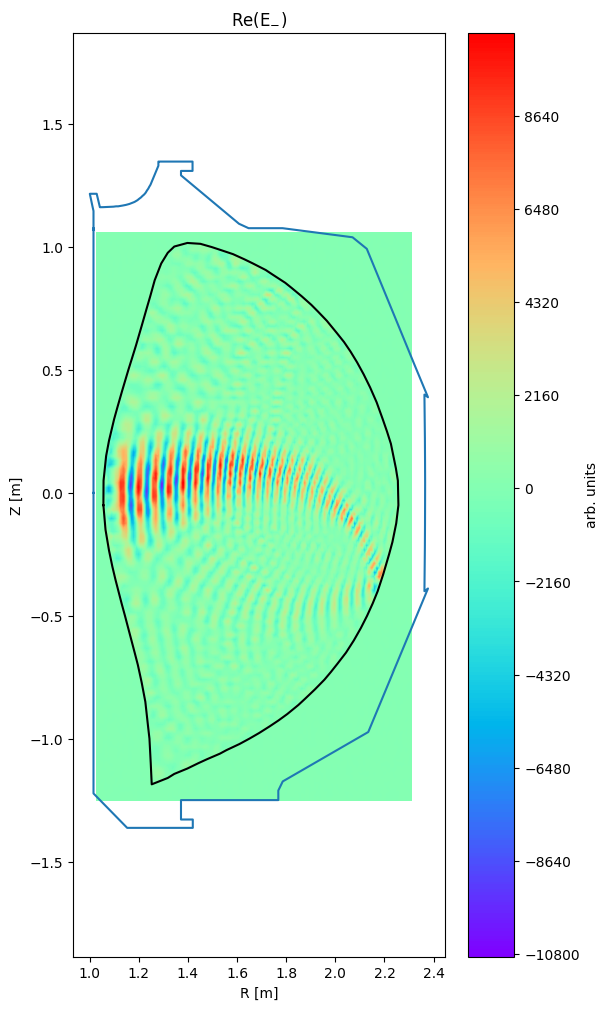

In [6]:
# now try plotting E+
aorsa_pp.plot_result_2D(key='re_eminus', title=r'Re(E$_{-}$)', cbar_label='arb. units', cmap='rainbow', figsize=(6,12))

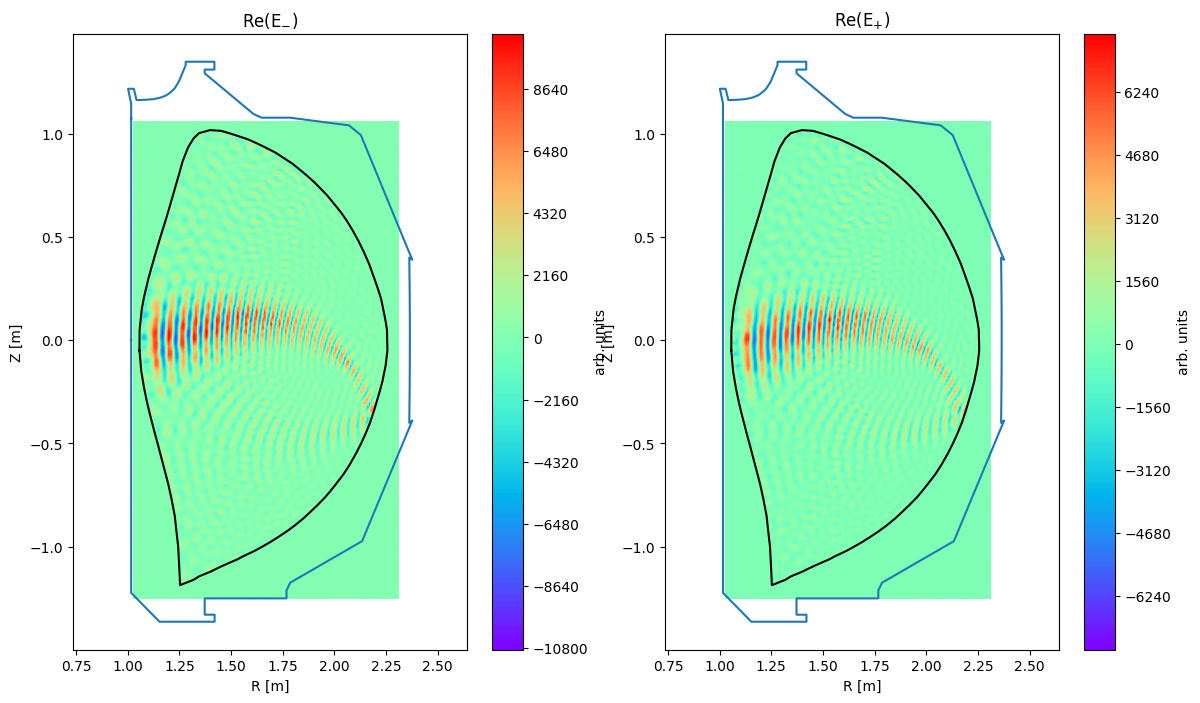

In [7]:
# now plot E+ and E-
aorsa_pp.plot_Eplus_Eminus(figsize=(14,8), logplot=False, cmap='rainbow')

In [8]:
print(aorsa_pp.aorsanml['STATE']['S_S_NAME'][1:])

['Dfast', 'D']


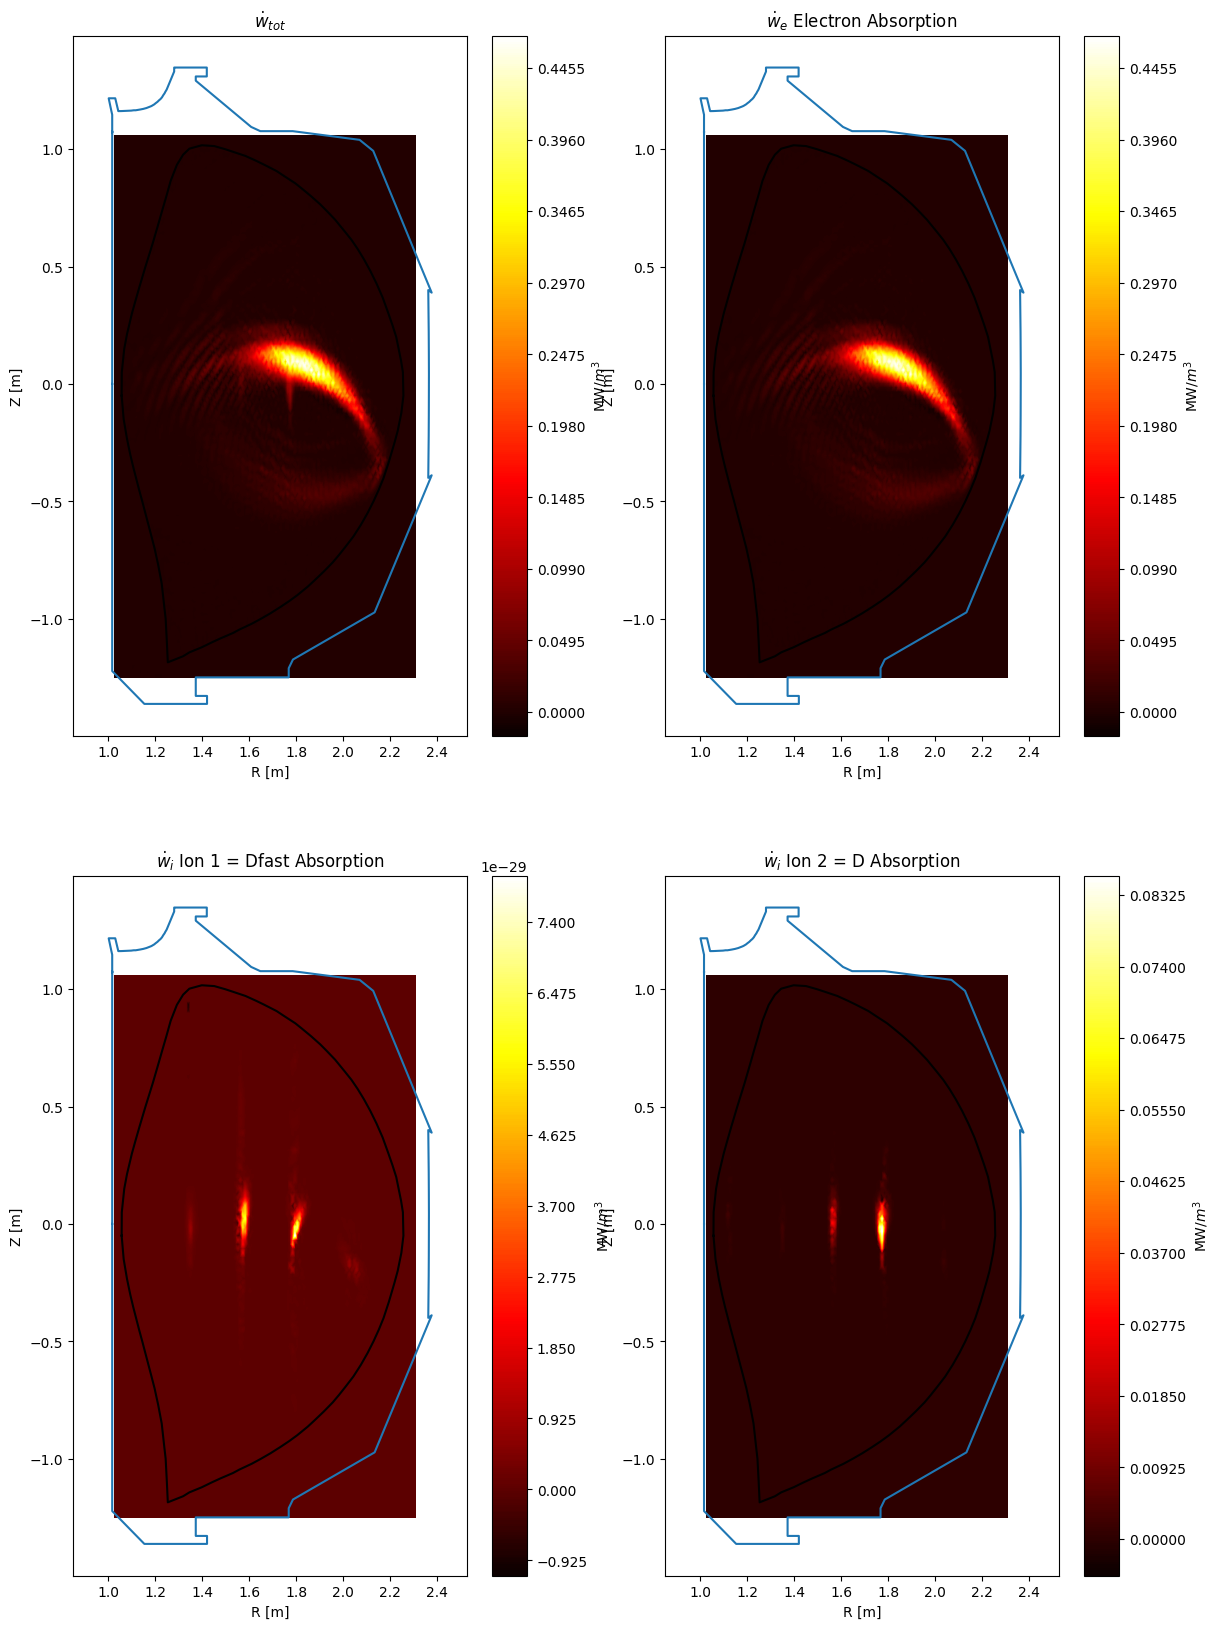

In [9]:
# plot absorption 
aorsa_pp.plot_species_absorption(figsize=(14,20))

In [22]:
print(np.min(np.log10(aorsa_pp.mesh.point_data['wdoti1'][:,0]+11)))

1.0413927


/tmp/ipykernel_20984/3216738081.py:59: RuntimeWarning: invalid value encountered in log10
  tcf=axs[row, col].tricontourf(aorsa_pp.R_array, aorsa_pp.Z_array, np.log10(aorsa_pp.mesh.point_data[key][:,0]+11), 400, cmap='hot')
/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/aorsa_env/lib/python3.8/site-packages/matplotlib/tri/_triangulation.py:181: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)


ValueError: z array must not contain non-finite values within the triangulation

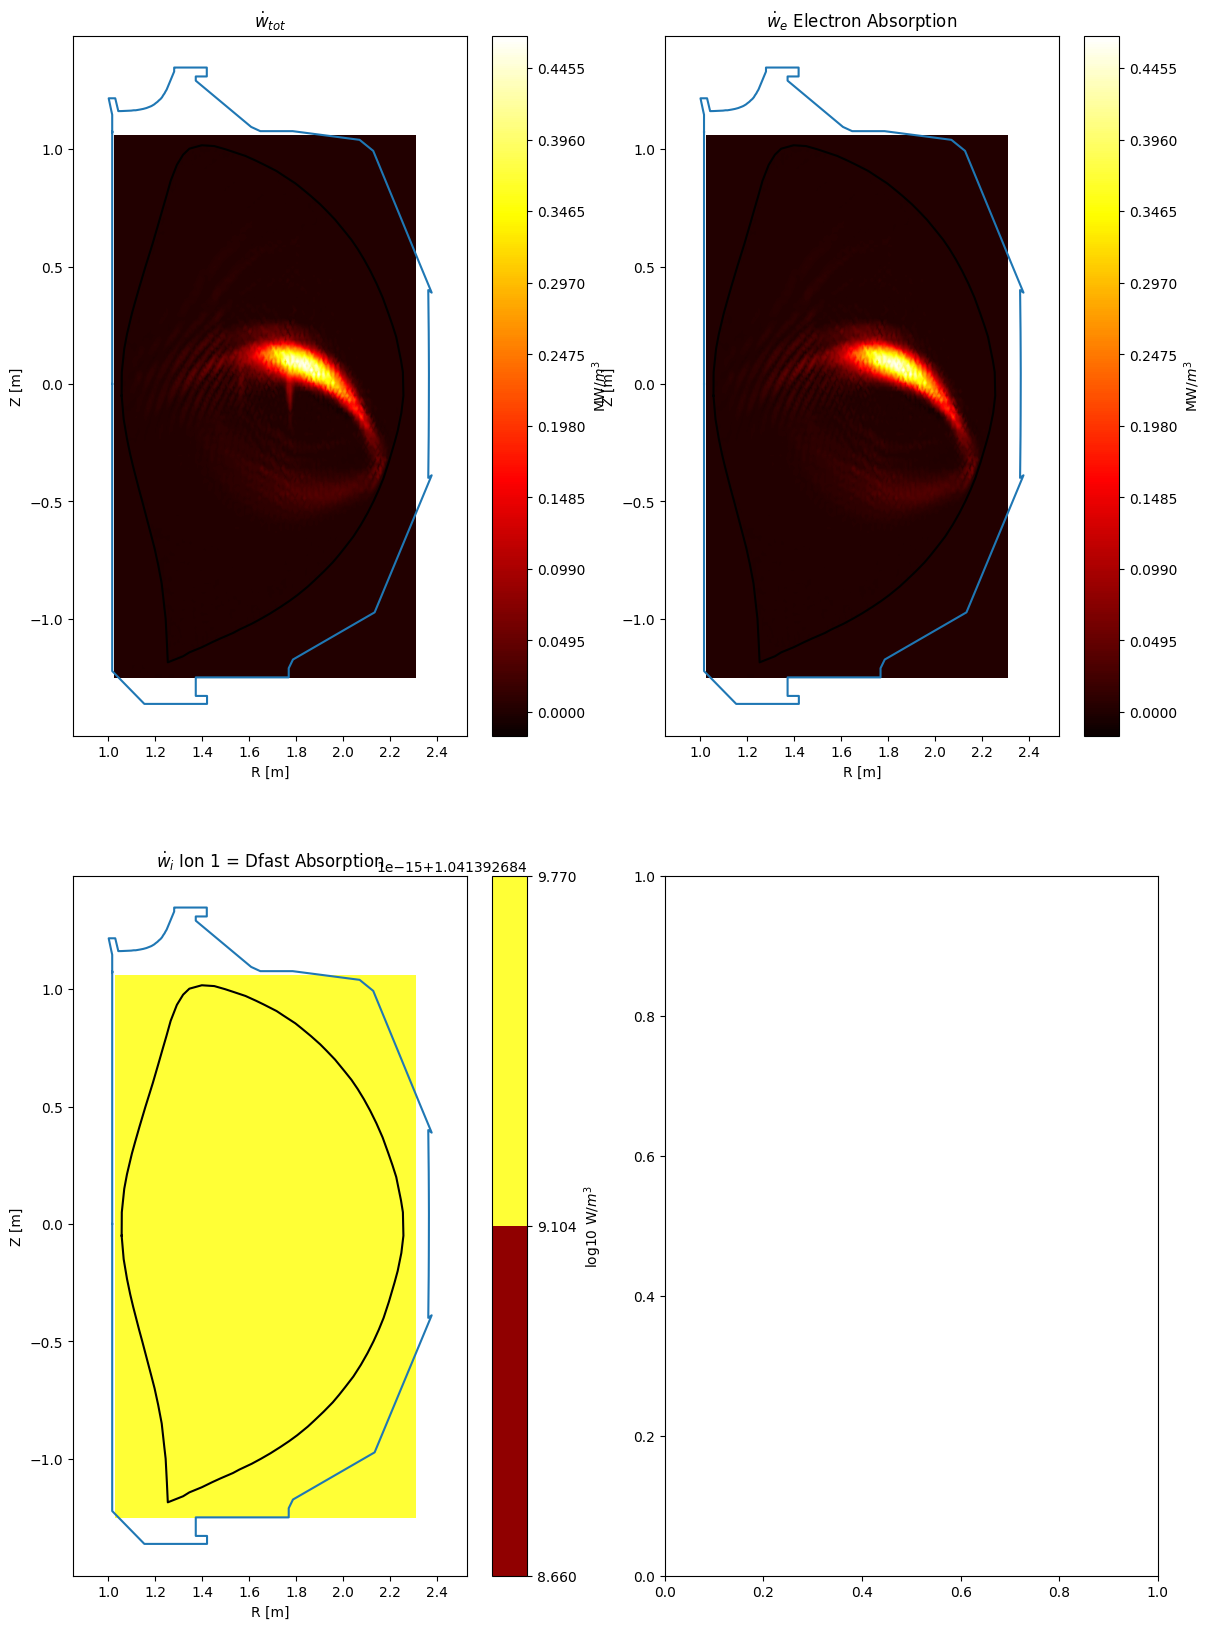

In [23]:
ion_names = aorsa_pp.aorsanml['STATE']['S_S_NAME'][1:]
figsize= (14,20)
if len(ion_names) > 2:
    fig, axs = plt.subplots(3, 2, figsize=figsize)
else:
    fig, axs = plt.subplots(2, 2, figsize=figsize)

# plot total abosorption 
if aorsa_pp.is_iterable(aorsa_pp.vtk_file):
    tcf0=axs[0,0].tricontourf(aorsa_pp.R_array, aorsa_pp.Z_array, aorsa_pp.get_multifile_sum('wdot_tot')/1e6, 400, cmap='hot')
else:
    tcf0=axs[0,0].tricontourf(aorsa_pp.R_array, aorsa_pp.Z_array, aorsa_pp.mesh.point_data['wdot_tot'][:,0]/1e6, 400, cmap='hot')

cb0 = fig.colorbar(tcf0)
cb0.set_label(r'MW/$m^3$')
axs[0,0].axis('equal')
axs[0,0].set_xlabel('R [m]')
axs[0,0].set_ylabel('Z [m]')
axs[0,0].set_title(r'$\dot{w}_{tot}$')
axs[0,0].plot(aorsa_pp.R_lcfs, aorsa_pp.Z_lcfs, 'black')
axs[0,0].plot(aorsa_pp.R_wall, aorsa_pp.Z_wall)

# plot electron absorption 
if aorsa_pp.is_iterable(aorsa_pp.vtk_file):
    tcf1=axs[0,1].tricontourf(aorsa_pp.R_array, aorsa_pp.Z_array, aorsa_pp.get_multifile_sum('wdote')/1e6, 400, cmap='hot')
else:
    tcf1=axs[0,1].tricontourf(aorsa_pp.R_array, aorsa_pp.Z_array, aorsa_pp.mesh.point_data['wdote'][:,0]/1e6, 400, cmap='hot')

cb1 = fig.colorbar(tcf1)
cb1.set_label(r'MW/$m^3$')
axs[0,1].axis('equal')
axs[0,1].set_xlabel('R [m]')
axs[0,1].set_ylabel('Z [m]')
axs[0,1].set_title(r'$\dot{w}_{e}$ Electron Absorption')
axs[0,1].plot(aorsa_pp.R_lcfs, aorsa_pp.Z_lcfs, 'black')
axs[0,1].plot(aorsa_pp.R_wall, aorsa_pp.Z_wall)

for i in range(len(ion_names)):
    if i == 0:
        row = 1
        col= 0

    elif i == 1:
        row = 1
        col = 1

    elif i == 2:
        row = 2
        col = 0

    elif i == 3:
        row = 2
        col = 1
    
    key = 'wdoti' + str(i+1)
    if aorsa_pp.is_iterable(aorsa_pp.vtk_file):
        tcf=axs[row, col].tricontourf(aorsa_pp.R_array, aorsa_pp.Z_array,  aorsa_pp.get_multifile_sum(key)/1e6, 400, cmap='hot')
    else:
        tcf=axs[row, col].tricontourf(aorsa_pp.R_array, aorsa_pp.Z_array, np.log10(aorsa_pp.mesh.point_data[key][:,0]+11), 400, cmap='hot')
    cb = fig.colorbar(tcf)
    cb.set_label(r'log10 W/$m^3$')
    axs[row, col].axis('equal')
    axs[row, col].set_xlabel('R [m]')
    axs[row, col].set_ylabel('Z [m]')
    axs[row, col].set_title(r'$\dot{w}_i$ ' + f'Ion {str(i+1)} = '+ f'{ion_names[i]} Absorption')
    axs[row, col].plot(aorsa_pp.R_lcfs, aorsa_pp.Z_lcfs, 'black')
    axs[row, col].plot(aorsa_pp.R_wall, aorsa_pp.Z_wall)


plt.show()
plt.close()

In [ ]:

# testing out the multi-phi version of this tool 

casepath =  '/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/'
eqdsk_name = 'g147634.04525'
aorsa_input_file = 'aorsa2d_modified.in'

vtk_file1 ='/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/iterations_scripts/Efield_2D_iter29_nphi-11.vtk'
vtk_file2 ='/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/iterations_scripts/Efield_2D_iter29_nphi11.vtk'

vtk_file_list = [vtk_file1, vtk_file2]

['   90   86\n']


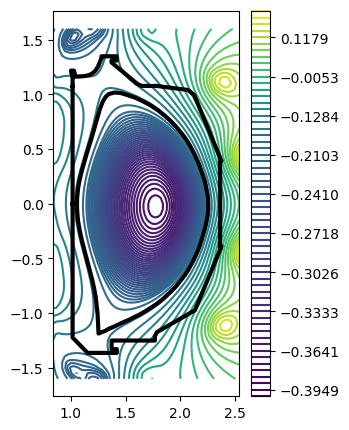

In [ ]:
aorsa_pp2 = Aorsa_Post_Process(vtk_file=vtk_file_list, aorsa2d_input_file=casepath+aorsa_input_file, eqdsk_file=casepath+eqdsk_name)

aorsa_pp2.plot_equilibrium(figsize=(3, 5), levels=np.append(np.linspace(-.4, -0.2, 40), np.linspace(-.19, 0.2, 20) ))

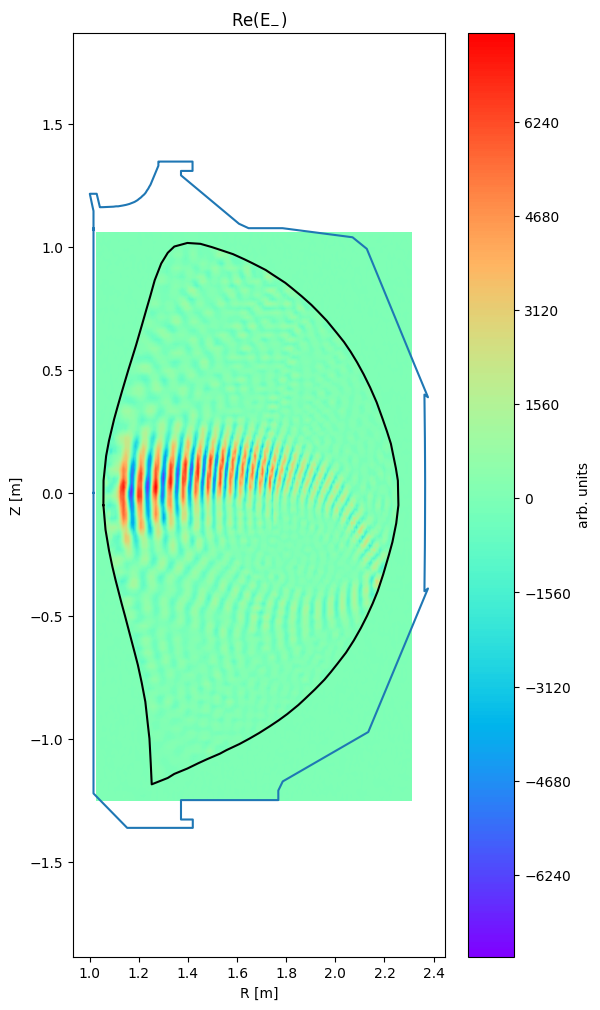

In [ ]:
aorsa_pp2.plot_result_2D(key='re_eminus', title=r'Re(E$_{-}$)', cbar_label='arb. units', cmap='rainbow', figsize=(6,12), multifile_idx=0)

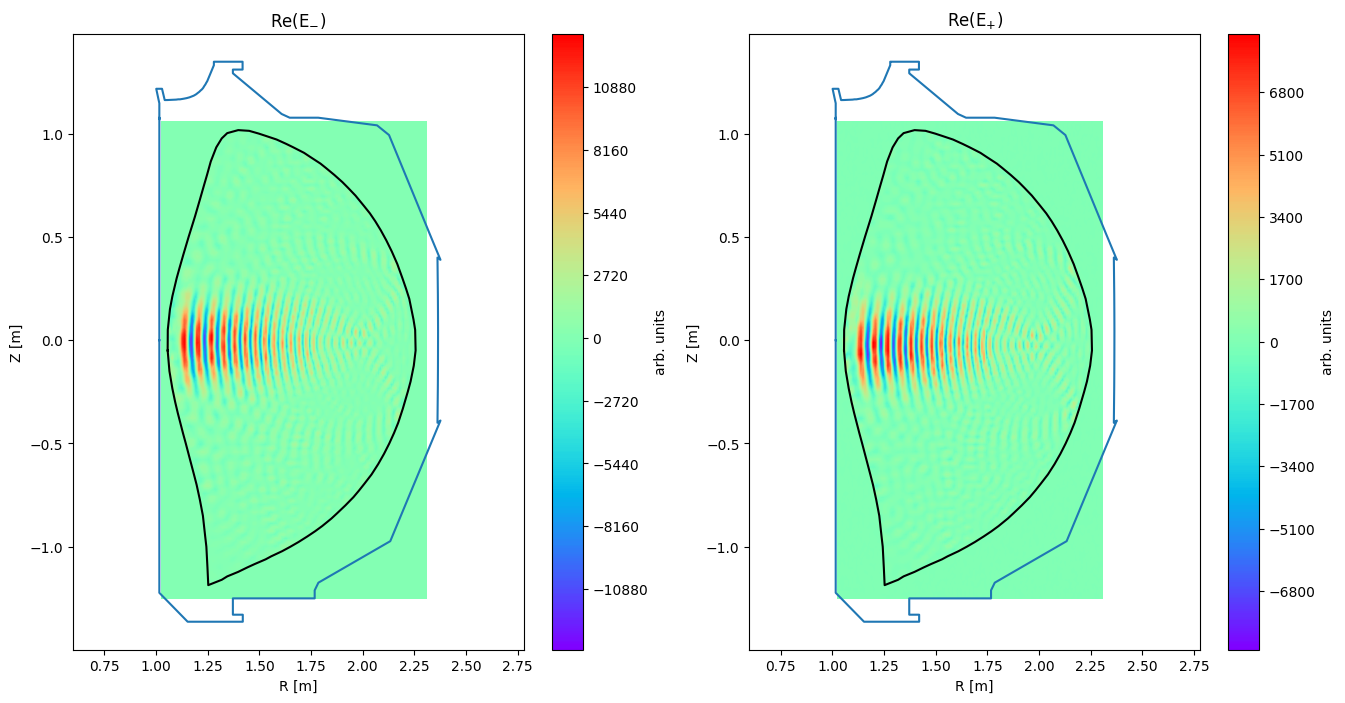

In [ ]:
aorsa_pp2.plot_Eplus_Eminus(figsize=(16,8), logplot=False, cmap='rainbow')

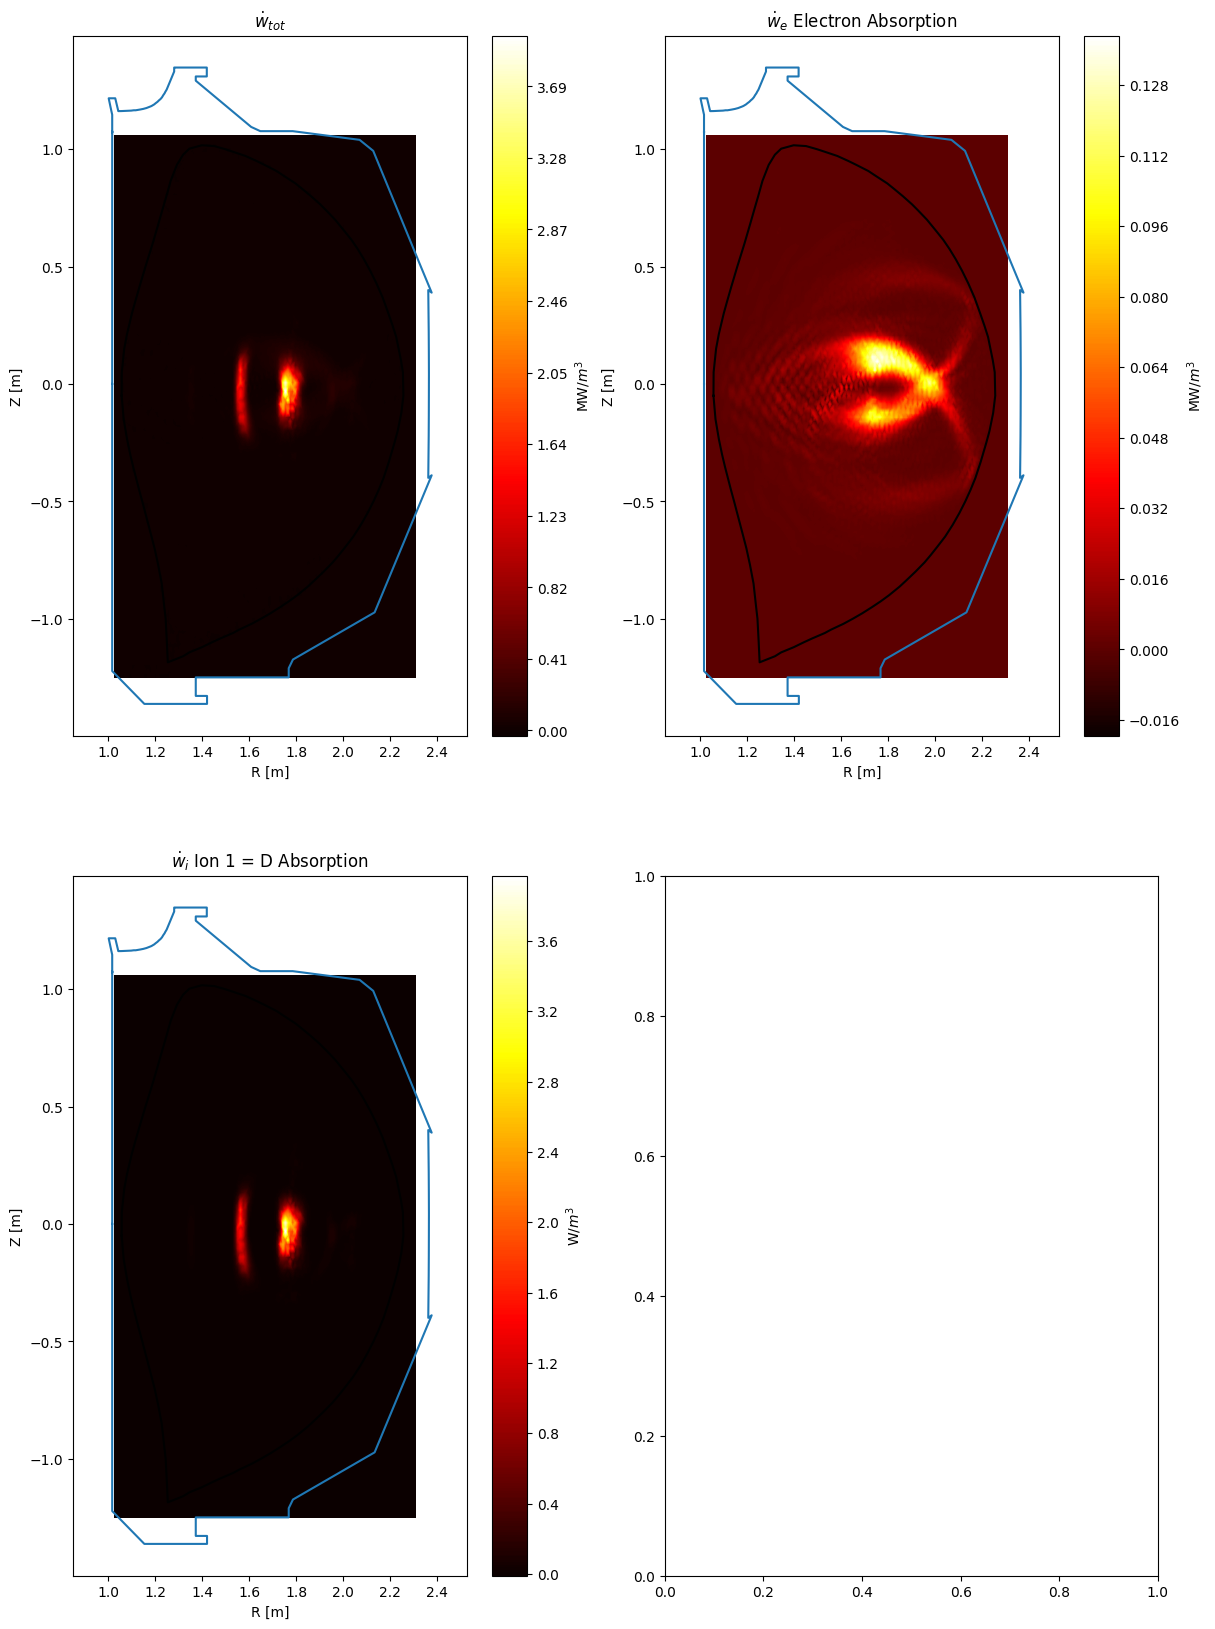

In [ ]:
aorsa_pp2.plot_species_absorption(figsize=(14,20))